In [ ]:
from gcrnn.utils import simulate_data
from gcrnn.gcrnn import GCRNN
import numpy as np
import torch


## Prepare dataset

In [3]:
train_data=simulate_data(n_samples=300, n_features=20, data_type="regression")
test_data=simulate_data(n_samples=300, n_features=20, data_type="regression")

## Standardize dataset 

In [4]:
# # standardize dataset in real application
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(train_data['X'])
# train_data['X'] = scaler.fit_transform(train_data['X'])
# test_data['X'] = scaler.fit_transform(test_data['X'])

## Instantiate the GCRNN trainer

In [5]:
lam=np.exp(np.linspace(np.log(0.01),np.log(0.5), 50))
gmcp_net = GCRNN(task_type='regression',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], output_dim=1, hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)



## Train model

In [6]:
#param_grid={'alpha':np.exp(np.linspace(np.log(0.001),np.log(0.1), 5))}
param_grid={"alpha":[0.03]}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], y=train_data['y'], 
                              param_grid=param_grid, init_num_epochs=2000, num_epochs=200, verbose=True, print_interval=200)

Epoch: 200: loss=31.220155029296876
Epoch: 400: loss=13.537245063781738
Epoch: 600: loss=9.072900085449218
Epoch: 800: loss=6.47699764251709
Epoch: 1000: loss=4.79101303100586
Epoch: 1200: loss=4.011989860534668
Epoch: 1400: loss=3.6114573764801023
Epoch: 1600: loss=3.4214322853088377
Epoch: 1800: loss=3.3056404876708982
Epoch: 2000: loss=3.2075178909301756
Lambda0=0.010000000000000004, size=20
Epoch: 200: loss=2.8941437651100728
Lambda1=0.010831107274360414, size=20
Epoch: 200: loss=2.7153212958832653
Lambda2=0.011731288478870311, size=20
Epoch: 200: loss=2.612698242772741
Lambda3=0.012706284398111268, size=20
Epoch: 200: loss=2.562596544132364
Lambda4=0.013762312937447512, size=20
Epoch: 200: loss=2.549505791079898
Lambda5=0.014906108776881212, size=20
Epoch: 200: loss=2.549127127060676
Lambda6=0.01614496632056856, size=20
Epoch: 200: loss=2.5470838456425766
Lambda7=0.017486786215901412, size=20
Epoch: 200: loss=2.550725160206886
Lambda8=0.018940125738823508, size=20
Epoch: 200: loss

## Solution path

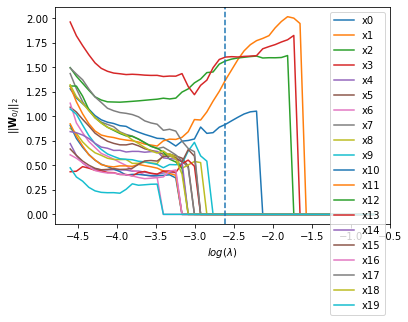

[ True  True  True  True False False False False False False False False
 False False False False False False False False]
best_lam=0.07359044528456263, best_params={'alpha': 0.03}


In [7]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [8]:
R2_train = gmcp_net.score(X=train_data['X'], y=train_data['y'], best=True)
R2_test=gmcp_net.score(X=test_data['X'], y=test_data['y'], best=True)
print(f'train_R_squared={R2_train} test_R_squared={R2_test}')

train_R_squared=0.971047181426913 test_R_squared=0.933377782368902
